In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
file_path = "/content/drive/MyDrive/forestfires.csv"
data = pd.read_csv(file_path) # Use pd.read_csv to read a CSV file
print(data.head())

In [9]:
data = pd.read_csv("forestfires.csv")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [11]:
# prompt: generate a code that gives months a numerical value from (1-12) and days from (1-7)

import pandas as pd
import numpy as np
# ... (rest of your imports and file reading code)

# Create mappings for months and days of the week
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

# Apply the mappings to the DataFrame
data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)

print(data.head())


   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [13]:
def prepare_data(features):
    X = data[features].values
    y = data['area'].values.reshape(-1, 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Add intercept (bias) term
    #X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    #X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

    return X_train, X_val, y_train, y_val

In [15]:
features = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [17]:
X_train, X_val, y_train, y_val = prepare_data(features)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(413, 13)
(104, 13)
(413, 1)
(104, 1)


In [79]:
def MSE(y, y_hat):
    return np.mean(np.square(y - y_hat))
        

In [81]:
class RidgeRegression():
    """
        Ridge Regression with Regularization using OLS
    """


    def __init__(self, lamb=0):
        self.lamb = lamb  # Regularization parameter
        self.w = None      # Will store the learned weights

    def fit(self, X, y):
        # Number of features (including the bias term)
        n_features = X.shape[1]
        
        # Identity matrix of X with x0 = 0 for bias term
        I = np.eye(n_features)
        I[0, 0] = 0  # We don't regularize the bias term
      
        # Ridge regression: w = (X^T * X + lambda * I)^-1 * X^T * y
        self.w = np.linalg.pinv(X.T.dot(X) + self.lamb * I) @ X.T @ y
    
    def predict(self, X):
        # Compute the predictions: X @ w
        return X @ self.w


2004.135607434498


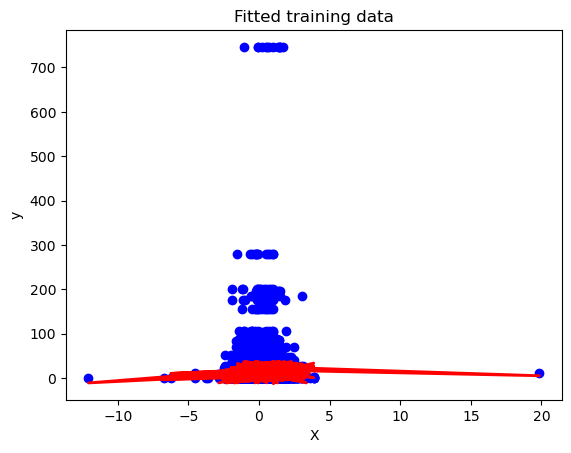

In [87]:
R = RidgeRegression(0)

R.fit(X_train, y_train)
predictions = R.predict( X_train )
#print(y_train.shape)
mse = MSE(y_train, predictions) 
print(mse)

plt.title("Fitted training data")
plt.plot(X_train, y_train, 'ob')
plt.plot(X_train, predictions, '-r', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.show()